<a href="https://colab.research.google.com/github/pavankumarnai/Task-2/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Importing Our Data Set
df = pd.read_csv("/content/drive/MyDrive/Electric_Vehicle_Population_Data.csv")

In [5]:
#Checking the structure of Dataframe
df.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [6]:
#Getting the column names in our dataset
column_info = df.dtypes.reset_index()
column_info.columns = ['Column Name', 'Data Type']

print(column_info)

                                          Column Name Data Type
0                                          VIN (1-10)    object
1                                              County    object
2                                                City    object
3                                               State    object
4                                         Postal Code   float64
5                                          Model Year     int64
6                                                Make    object
7                                               Model    object
8                               Electric Vehicle Type    object
9   Clean Alternative Fuel Vehicle (CAFV) Eligibility    object
10                                     Electric Range     int64
11                                          Base MSRP     int64
12                               Legislative District   float64
13                                     DOL Vehicle ID     int64
14                                   Veh

In [7]:
# Display summary statistics for numerical columns
summary_stats = df.describe()
print(summary_stats)

         Postal Code     Model Year  Electric Range      Base MSRP  \
count  130440.000000  130443.000000   130443.000000  130443.000000   
mean    98167.633878    2019.554633       76.705718    1495.677346   
std      2492.197784       2.989137       99.421571    9844.748414   
min      1730.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2018.000000        0.000000       0.000000   
50%     98121.000000    2020.000000       23.000000       0.000000   
75%     98370.000000    2022.000000      151.000000       0.000000   
max     99701.000000    2023.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         130138.000000    1.304430e+05       1.304400e+05  
mean              29.577026    2.051796e+08       5.297177e+10  
std               14.767508    8.710573e+07       1.640658e+09  
min                1.000000    4.385000e+03       1.081042e+09  
25%               18.000000    1.568004e+08 

In [8]:
# Display unique values in categorical columns
unique_values = df.nunique().reset_index()
unique_values.columns = ['Column Name', 'Unique Values']
print(unique_values)

                                          Column Name  Unique Values
0                                          VIN (1-10)           8827
1                                              County            166
2                                                City            656
3                                               State             46
4                                         Postal Code            787
5                                          Model Year             21
6                                                Make             35
7                                               Model            121
8                               Electric Vehicle Type              2
9   Clean Alternative Fuel Vehicle (CAFV) Eligibility              3
10                                     Electric Range            102
11                                          Base MSRP             31
12                               Legislative District             49
13                                

In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                222
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 305
DOL Vehicle ID                                         0
Vehicle Location                                      33
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64


In [10]:
# Impute missing values in 'County', 'City', 'Postal Code', 'Electric Utility', '2020 Census Tract'
columns_to_impute = ['County', 'City', 'Postal Code', 'Electric Utility', '2020 Census Tract']
for column in columns_to_impute:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [11]:
# Impute missing values in 'Legislative District' with the median
df['Legislative District'].fillna(df['Legislative District'].median(), inplace=True)

In [12]:
# Remove rows with missing values in 'Vehicle Location' and 'Model'
df.dropna(subset=['Vehicle Location','Model'], inplace=True)

In [13]:
missing_values = df.isnull().sum()
print(missing_values)

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [14]:
# Calculate the z-score for the 'Base MSRP' column
z_scores = (df['Base MSRP'] - df['Base MSRP'].mean()) / df['Base MSRP'].std()

# Define a threshold for considering values as outliers (e.g., z-score > 3 or < -3)
z_score_threshold = 30

# Identify rows where 'Base MSRP' is an outlier
outlier_rows = df[abs(z_scores) > z_score_threshold]


# Assuming 'outlier_index' is the index of the row with the outlier
df = df.drop(index=90057)

In [15]:
# Calculate the z-score for the 'Base MSRP' column
z_scores = (df['Electric Range'] - df['Electric Range'].mean()) / df['Electric Range'].std()

# Define a threshold for considering values as outliers (e.g., z-score > 3 or < -3)
z_score_threshold = 3

# Identify rows where 'Base MSRP' is an outlier
outlier_rows = df[abs(z_scores) > z_score_threshold]

outlier_rows

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract


In [16]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [17]:
df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

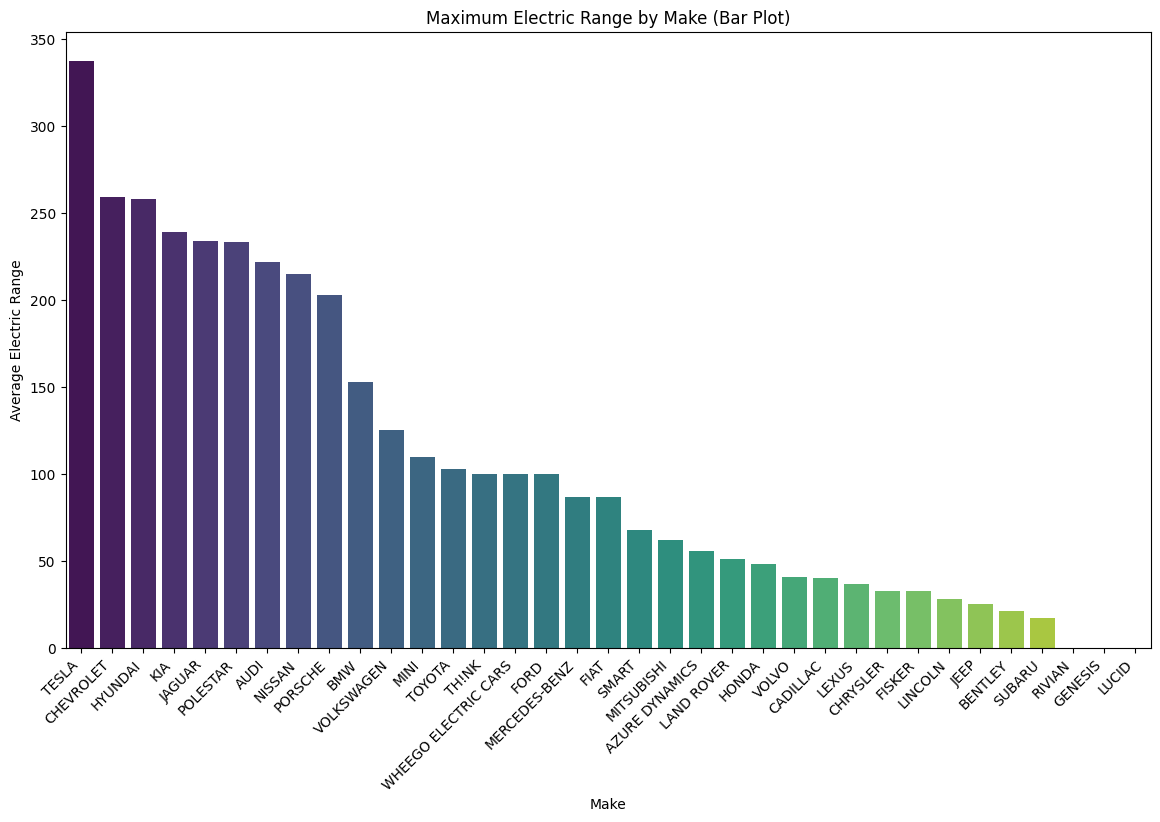

In [18]:
#As we are analyzing Electrical Vehicle Data, Lets plot the Electric Range by Make
# Calculate the average electric range for each make
avg_electric_range_by_make = df.groupby('Make')['Electric Range'].max().reset_index()

# Sort the DataFrame by electric range in descending order
avg_electric_range_by_make = avg_electric_range_by_make.sort_values(by='Electric Range', ascending=False)

# Create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Make', y='Electric Range', data=avg_electric_range_by_make, palette='viridis')
plt.title('Maximum Electric Range by Make (Bar Plot)')
plt.xlabel('Make')
plt.ylabel('Average Electric Range')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

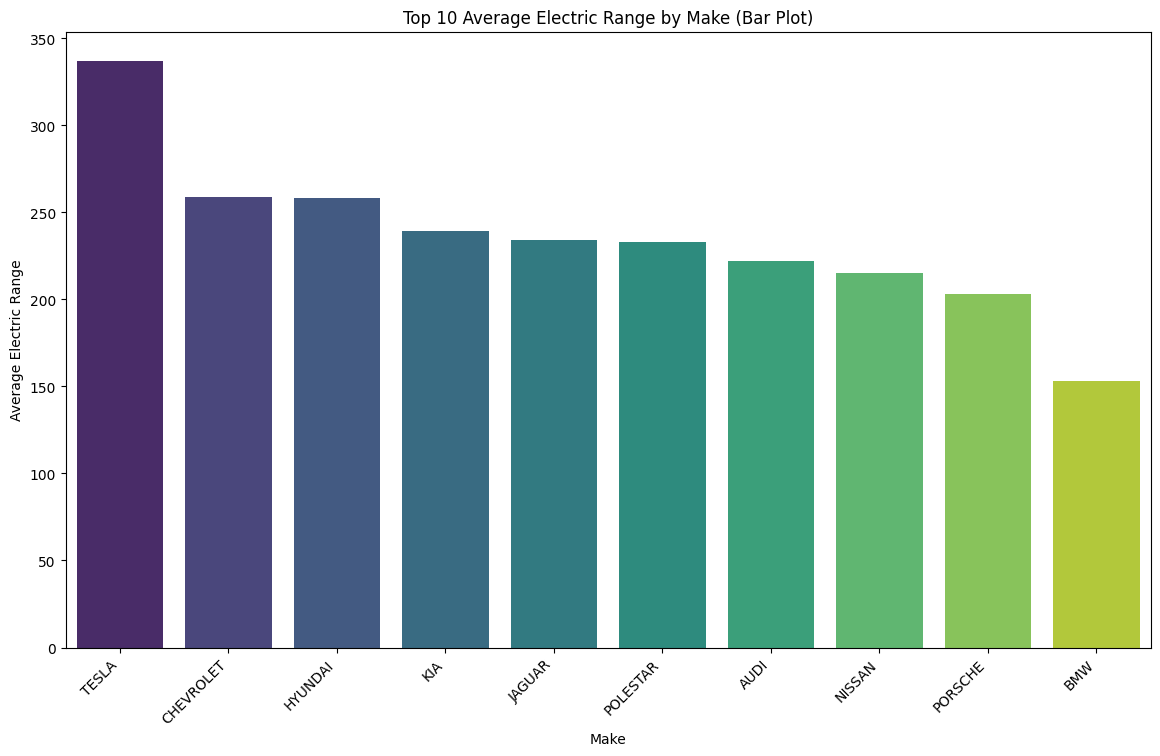

In [19]:
#Lets Examine the Average Range of Top 10 Good Range Cars
# Sort the DataFrame by electric range in descending order
avg_electric_range_by_make = avg_electric_range_by_make.sort_values(by='Electric Range', ascending=False)

# Select the top 10 makes
top_10_makes = avg_electric_range_by_make.head(10)

# Create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Make', y='Electric Range', data=top_10_makes, palette='viridis')
plt.title('Top 10 Average Electric Range by Make (Bar Plot)')
plt.xlabel('Make')
plt.ylabel('Average Electric Range')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()



In [20]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


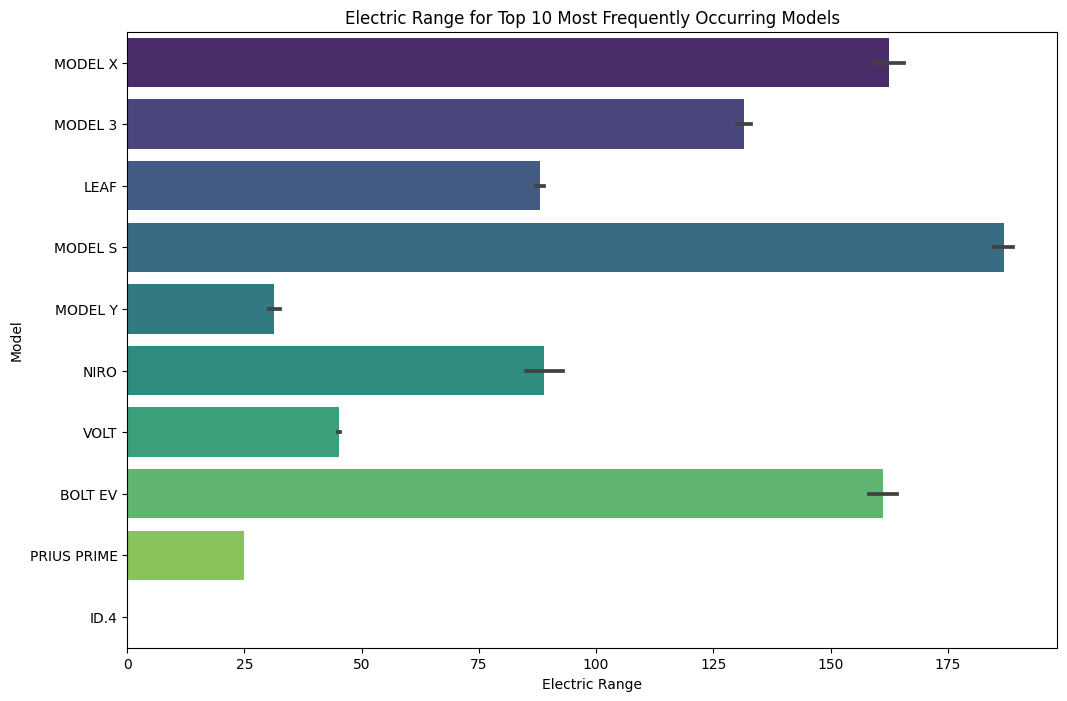

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify the most frequently occurring models
top_models = df['Model'].value_counts().head(10).index

# Filter the DataFrame for the top models
top_models_data = df[df['Model'].isin(top_models)]

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Electric Range', y='Model', data=top_models_data, palette='viridis', orient='h')
plt.title('Electric Range for Top 10 Most Frequently Occurring Models')
plt.xlabel('Electric Range')
plt.ylabel('Model')
plt.show()


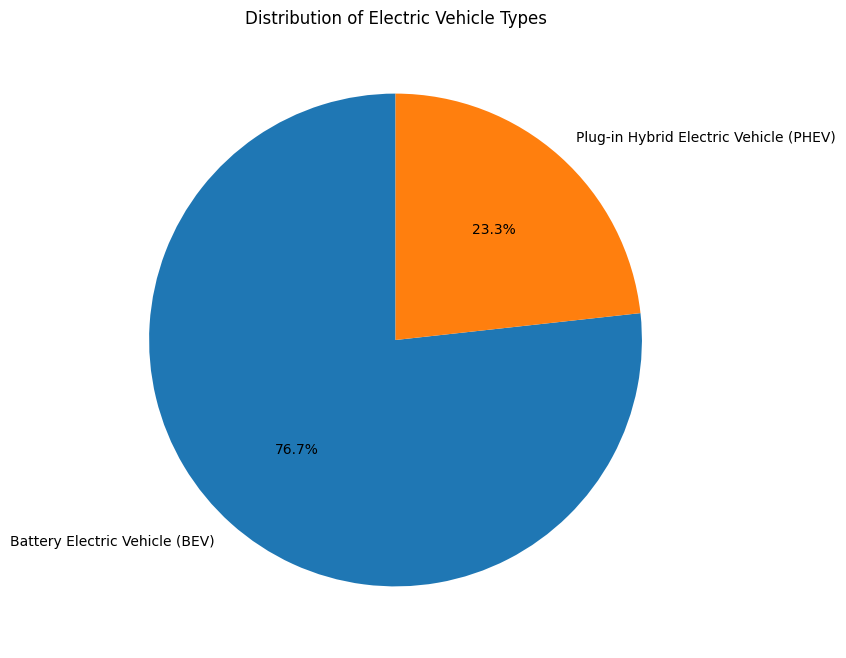

In [22]:
# Calculate the distribution of electric vehicle types
electric_vehicle_types_distribution = df['Electric Vehicle Type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(electric_vehicle_types_distribution, labels=electric_vehicle_types_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Electric Vehicle Types')
plt.show()

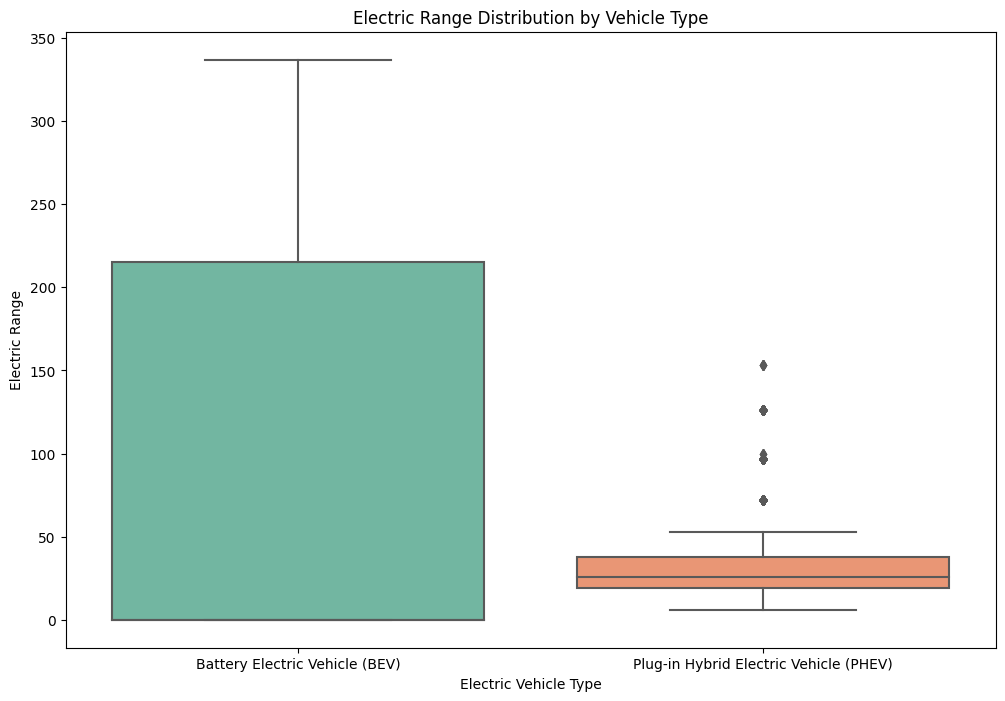

In [23]:
# Create a box plot to compare electric range distributions by vehicle type
plt.figure(figsize=(12, 8))
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=df, palette='Set2')
plt.title('Electric Range Distribution by Vehicle Type')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Electric Range')
plt.show()

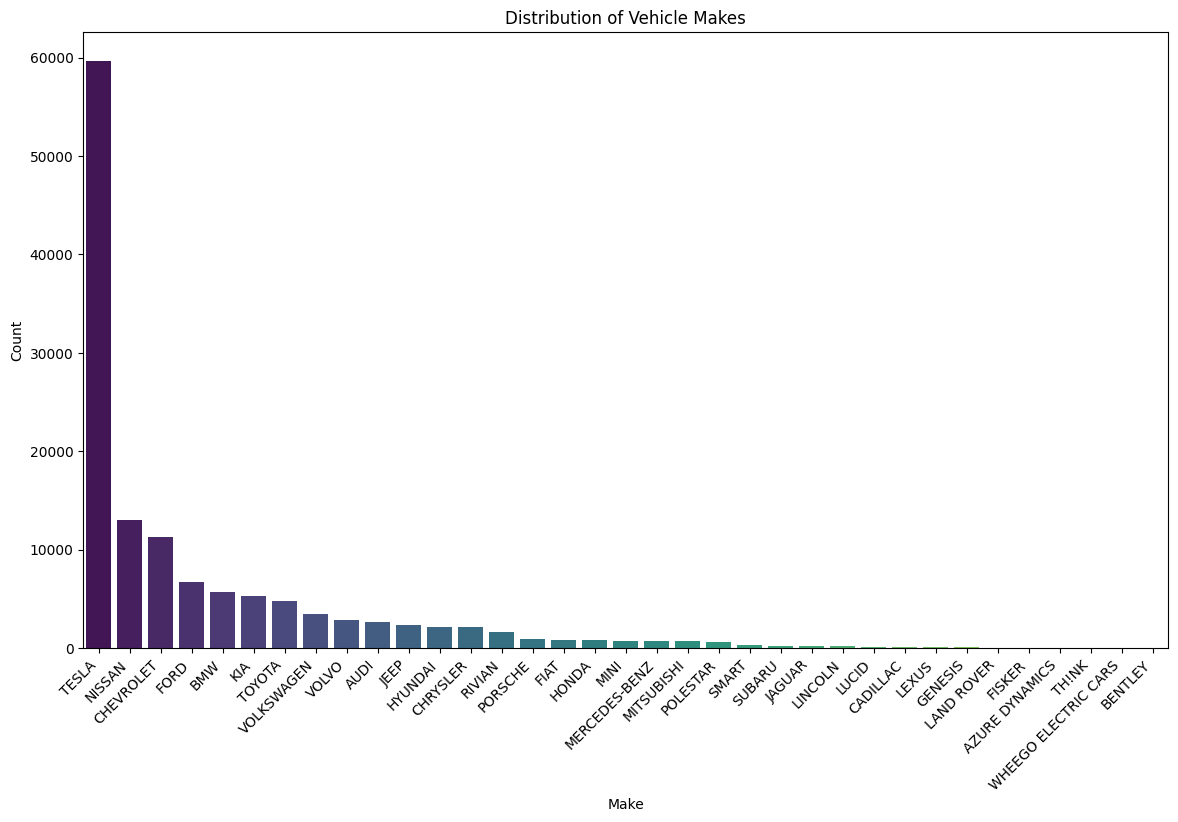

In [24]:
# Create a count plot for the distribution of vehicle makes
plt.figure(figsize=(14, 8))
sns.countplot(x='Make', data=df, order=df['Make'].value_counts().index, palette='viridis')
plt.title('Distribution of Vehicle Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

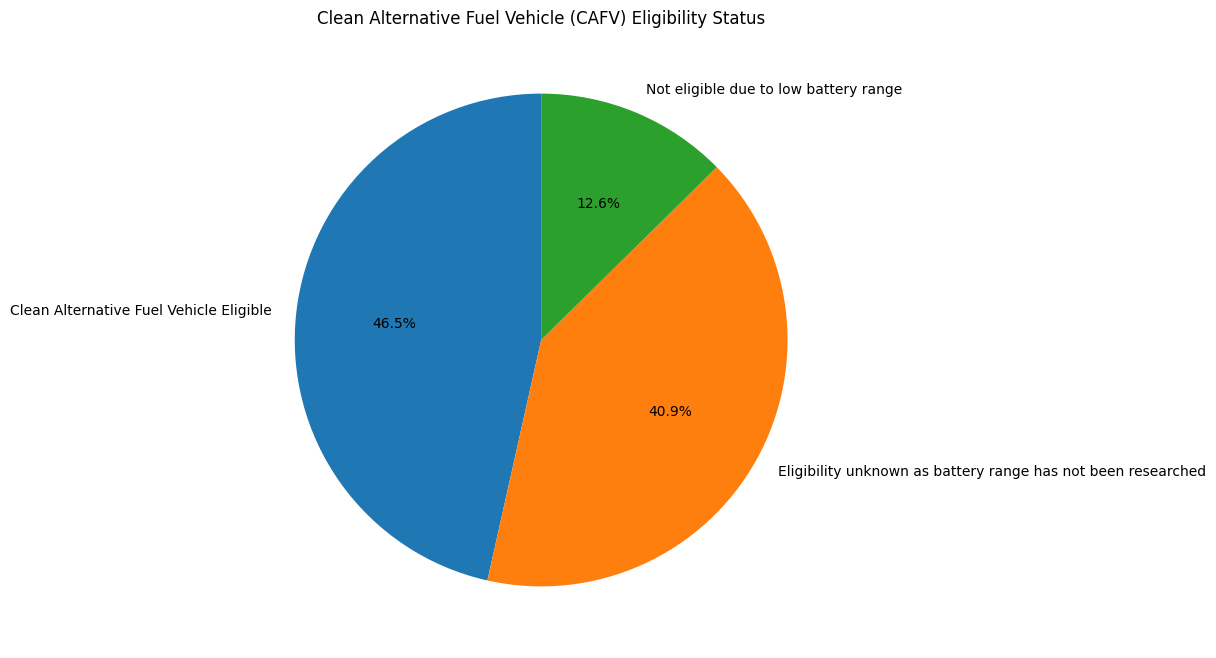

In [25]:


# Calculate the distribution of 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' in your DataFrame
electric_vehicle_types_distribution = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(electric_vehicle_types_distribution, labels=electric_vehicle_types_distribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Clean Alternative Fuel Vehicle (CAFV) Eligibility Status')
plt.show()

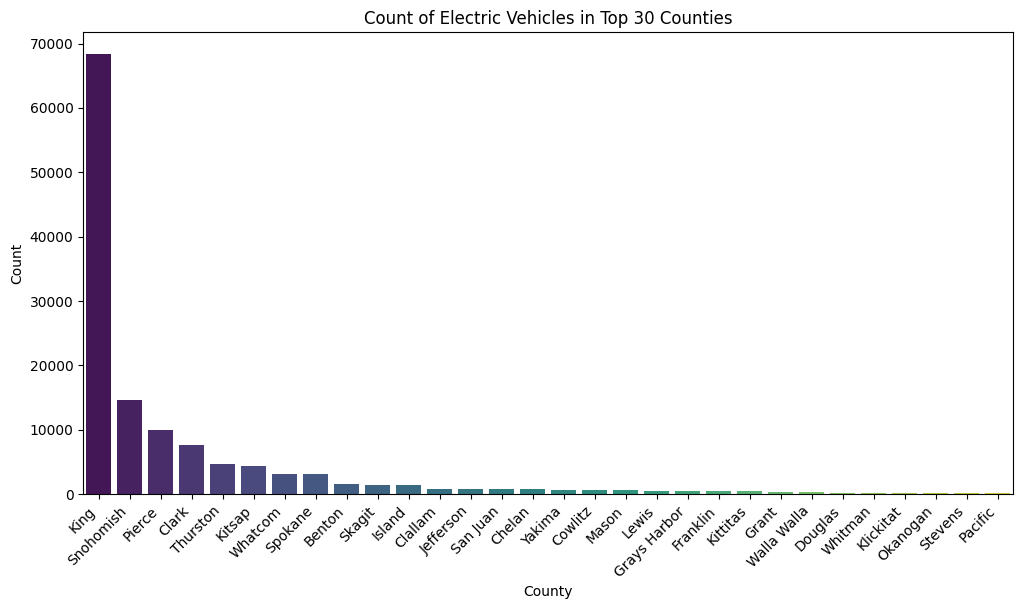

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a column 'County' in your DataFrame
top_counties = df['County'].value_counts().head(30).index

plt.figure(figsize=(12, 6))
ax = sns.countplot(x='County', data=df[df['County'].isin(top_counties)], palette='viridis', order=top_counties)



plt.title('Count of Electric Vehicles in Top 30 Counties')
plt.xlabel('County')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()
